In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
%matplotlib inline

In [2]:
cnxn_string = ("postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}")

In [3]:
engine = create_engine(cnxn_string.format(
    username= "postgres",
    pswd="08090785267",
    host="localhost",
    port=5432,
    database="sqldata"
))

In [ ]:
# 2. Copy the data from the public transportation dataset to the ZoomZoom customer
# database by creating a table for it in the ZoomZoom dataset.


# 3. Find the maximum and minimum percentages in this data. Values below 0 will
# most likely indicate missing data.


In [4]:
max_min_query = """
SELECT
    MAX(public_transportation_pct) AS max_pct,
    MIN(public_transportation_pct) AS min_pct
FROM public_transportation_by_zip;
"""

In [7]:
pd.read_sql_query(max_min_query, engine)

,max_pct,min_pct
0,100.0,-666666666.0


In [ ]:
# 4. Calculate the average sales amounts for customers that live in high public
# transportation regions (over 10%) as well as low public transportation usage (less
# than, or equal to, 10%).


In [9]:
average_sales_per_customer_query ="""
SELECT 
    (public_transportation_pct > 10) AS is_high_public_transport,
    COUNT(s.customer_id) :: DOUBLE PRECISION / COUNT(DISTINCT c.customer_id) AS sales_per_customer
FROM customers AS c
INNER JOIN public_transportation_by_zip AS t ON t.zip_code = c.postal_code :: FLOAT
LEFT JOIN sales AS s ON s.customer_id = c.customer_id
WHERE public_transportation_pct >= 0
GROUP BY 1;
"""

In [10]:
pd.read_sql_query(average_sales_per_customer_query, engine)

,is_high_public_transport,sales_per_customer
0,False,0.715691
1,True,0.831594


In [ ]:
# 5. Read the data into pandas and plot a histogram of the distribution (hint: you can
# use my_data.plot.hist(y='public_transportation_pct') to plot a histogram if you
# read the data into a my_data pandas DataFrame).


In [13]:
pub_query = "SELECT * FROM public_transportation_by_zip WHERE public_transportation_pct >= 0;"
my_data = pd.read_sql_query(pub_query, engine)

<Axes: ylabel='Frequency'>

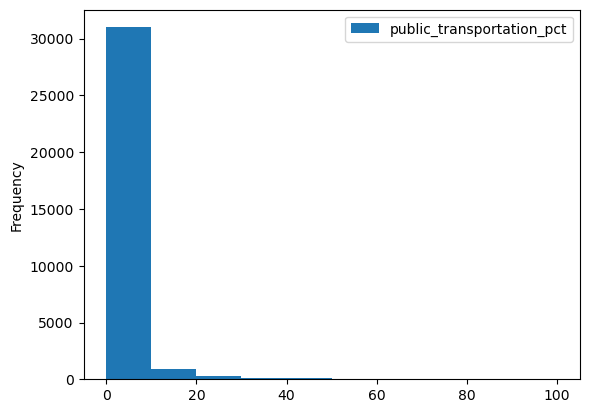

In [14]:
my_data.plot.hist(y='public_transportation_pct')

In [15]:
# 6. Group customers based on their zip code public transportation usage, rounded
# to the nearest 10%, and look at the average number of transactions per customer.
# Export this data to Excel and create a scatterplot to better understand the
# relationship between public transportation usage and sales.


In [19]:
sales_per_customer_query ="""
SELECT 
   10 * ROUND(public_transportation_pct/10) AS public_transport_group,
    COUNT(s.customer_id) :: DOUBLE PRECISION / COUNT(DISTINCT c.customer_id) AS sales_per_customer
FROM customers AS c
INNER JOIN public_transportation_by_zip AS t ON t.zip_code = c.postal_code :: FLOAT
LEFT JOIN sales AS s ON s.customer_id = c.customer_id
WHERE public_transportation_pct >= 0
GROUP BY 1;
"""

In [20]:
sales_per_customer = pd.read_sql_query(sales_per_customer_query, engine)

In [21]:
sales_per_customer

,public_transport_group,sales_per_customer
0,0.0,0.714307
1,10.0,0.733236
2,20.0,0.811272
3,30.0,0.881288
4,40.0,0.755474
5,50.0,1.051471
6,60.0,0.994012
7,70.0,1.146341
8,80.0,0.763158


<Axes: xlabel='public_transport_group', ylabel='sales_per_customer'>

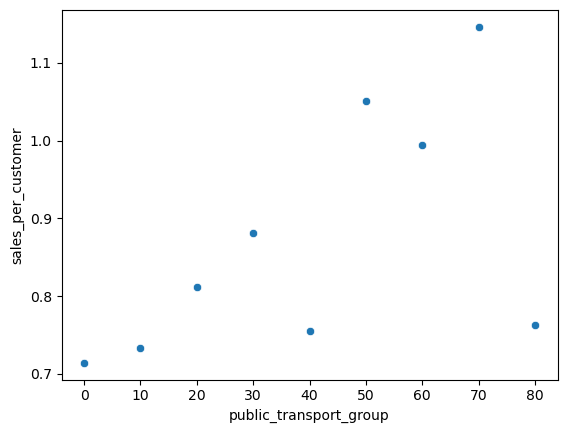

In [22]:
sns.scatterplot( x='public_transport_group', y='sales_per_customer', data=sales_per_customer)

In [23]:
# The corelation between sales per customer and public transport group


In [24]:
sales_per_customer['public_transport_group'].corr(sales_per_customer['sales_per_customer'])

0.5750441024143271